In [1]:
# Intro to queryverse
using Queryverse,VegaDatasets,IndexedTables

In [2]:
cars = dataset("cars")

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""chevrolet chevelle malibu""",18.0,8,307.0,130,3504,12.0,"""1970-01-01""","""USA"""
"""buick skylark 320""",15.0,8,350.0,165,3693,11.5,"""1970-01-01""","""USA"""
"""plymouth satellite""",18.0,8,318.0,150,3436,11.0,"""1970-01-01""","""USA"""
"""amc rebel sst""",16.0,8,304.0,150,3433,12.0,"""1970-01-01""","""USA"""
"""ford torino""",17.0,8,302.0,140,3449,10.5,"""1970-01-01""","""USA"""
"""ford galaxie 500""",15.0,8,429.0,198,4341,10.0,"""1970-01-01""","""USA"""
"""chevrolet impala""",14.0,8,454.0,220,4354,9.0,"""1970-01-01""","""USA"""
"""plymouth fury iii""",14.0,8,440.0,215,4312,8.5,"""1970-01-01""","""USA"""
"""pontiac catalina""",14.0,8,455.0,225,4425,10.0,"""1970-01-01""","""USA"""
"""amc ambassador dpl""",15.0,8,390.0,190,3850,8.5,"""1970-01-01""","""USA"""


In [3]:
# Pipe in julia
cars |> Voyager()

Voyager(Electron.Window(Application(Base.PipeEndpoint(RawFD(0x00000037) paused, 0 bytes waiting), Process(`/Users/a.a.gonzalez.paje/.julia/artifacts/8dcb05674719648a37669520bc9a6ef8773032f2/Julia.app/Contents/MacOS/Julia /Users/a.a.gonzalez.paje/.julia/packages/Electron/MNI24/src/main.js /var/folders/7s/nml3cfbd3zb3q0_jkx5c4b_h0000gn/T/jlel-caf432f8da3a11ea023eb3bb6e28ab8e /var/folders/7s/nml3cfbd3zb3q0_jkx5c4b_h0000gn/T/jlel-sn-caf439b0da3a11ea3f19f7de4c556a2b ix1hoW8ftoLU7gj0oOpynKmsxFvZ6rS18o3FS0yIx4dZHsI+AWdhnALeGn20Q5oFIH9AUQBTGkvPU6BVoTUQG87Hq5MmNHQ+ncWGEQ0NI+l1VEQOFRUsGbEo2UCRZsPQ/OgaEjL6AYyEsF5K8rxTcKXt5Xw6YpkKfgn1r9e9wnA=`, ProcessRunning), [1 window]), 1, true, Channel{Any}(sz_max:128,sz_curr:0)))

In [4]:
# Filter and Save using pipe
cars |> 
    @filter(_.Origin=="USA")|>
    save("us_cars.csv")

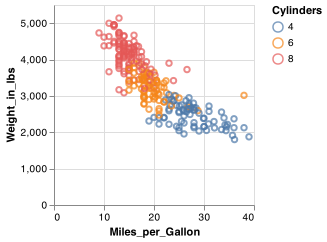

In [5]:
# Using vegalite to plot
load("us_cars.csv") |>
@vlplot(:point,x=:Miles_per_Gallon,y=:Weight_in_lbs,color="Cylinders:n")

In [6]:
cars |> save("cars_2.feather")

In [7]:
DataFrame(load("cars_2.feather"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [8]:
load("cars_2.feather") |> DataFrame

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [9]:
load("cars_2.feather") |> table

Table with 406 rows, 9 columns:
Columns:
#  colname           type
────────────────────────────────────────────
1  Name              String
2  Miles_per_Gallon  Union{Missing, Float64}
3  Cylinders         Int64
4  Displacement      Float64
5  Horsepower        Union{Missing, Int64}
6  Weight_in_lbs     Int64
7  Acceleration      Float64
8  Year              String
9  Origin            String

In [10]:
cars |>
    @filter(_.Origin=="Europe") |>
    @orderby_descending(_.Horsepower)

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""renault lecar deluxe""",40.9,4,85.0,#NA,1835,17.3,"""1980-01-01""","""Europe"""
"""renault 18i""",34.5,4,100.0,#NA,2320,15.8,"""1982-01-01""","""Europe"""
"""peugeot 604sl""",16.2,6,163.0,133,3410,15.8,"""1978-01-01""","""Europe"""
"""volvo 264gl""",17.0,6,163.0,125,3140,13.6,"""1978-01-01""","""Europe"""
"""mercedes-benz 280s""",16.5,6,168.0,120,3820,16.7,"""1976-01-01""","""Europe"""
"""citroen ds-21 pallas""",#NA,4,133.0,115,3090,17.5,"""1970-01-01""","""Europe"""
"""saab 99le""",25.0,4,121.0,115,2671,13.5,"""1975-01-01""","""Europe"""
"""saab 99gle""",21.6,4,121.0,115,2795,15.7,"""1978-01-01""","""Europe"""
"""bmw 2002""",26.0,4,121.0,113,2234,12.5,"""1970-01-01""","""Europe"""
"""volvo 145e (sw)""",18.0,4,121.0,112,2933,14.5,"""1972-01-01""","""Europe"""


In [11]:
# To an Array
cars |>
    @filter(_.Origin=="Europe") |>
    @orderby_descending(_.Horsepower) |> collect

73-element Array{NamedTuple{(:Name, :Miles_per_Gallon, :Cylinders, :Displacement, :Horsepower, :Weight_in_lbs, :Acceleration, :Year, :Origin),Tuple{String,DataValue{Float64},Int64,Float64,DataValue{Int64},Int64,Float64,String,String}},1}:
 (Name = "renault lecar deluxe", Miles_per_Gallon = DataValue{Float64}(40.9), Cylinders = 4, Displacement = 85.0, Horsepower = DataValue{Int64}(), Weight_in_lbs = 1835, Acceleration = 17.3, Year = "1980-01-01", Origin = "Europe")
 (Name = "renault 18i", Miles_per_Gallon = DataValue{Float64}(34.5), Cylinders = 4, Displacement = 100.0, Horsepower = DataValue{Int64}(), Weight_in_lbs = 2320, Acceleration = 15.8, Year = "1982-01-01", Origin = "Europe")
 (Name = "peugeot 604sl", Miles_per_Gallon = DataValue{Float64}(16.2), Cylinders = 6, Displacement = 163.0, Horsepower = DataValue{Int64}(133), Weight_in_lbs = 3410, Acceleration = 15.8, Year = "1978-01-01", Origin = "Europe")
 (Name = "volvo 264gl", Miles_per_Gallon = DataValue{Float64}(17.0), Cylinders = 6

In [12]:
# Map
1:10 |> @map(_^2)

10-element query result
 1
 4
 9
 16
 25
 36
 49
 64
 81
 100

In [13]:
cars |> @map({_.Name,_.Year})

Name,Year
"""chevrolet chevelle malibu""","""1970-01-01"""
"""buick skylark 320""","""1970-01-01"""
"""plymouth satellite""","""1970-01-01"""
"""amc rebel sst""","""1970-01-01"""
"""ford torino""","""1970-01-01"""
"""ford galaxie 500""","""1970-01-01"""
"""chevrolet impala""","""1970-01-01"""
"""plymouth fury iii""","""1970-01-01"""
"""pontiac catalina""","""1970-01-01"""
"""amc ambassador dpl""","""1970-01-01"""


In [14]:
cars |> @map({_.Name,Foo=_.Year})

Name,Foo
"""chevrolet chevelle malibu""","""1970-01-01"""
"""buick skylark 320""","""1970-01-01"""
"""plymouth satellite""","""1970-01-01"""
"""amc rebel sst""","""1970-01-01"""
"""ford torino""","""1970-01-01"""
"""ford galaxie 500""","""1970-01-01"""
"""chevrolet impala""","""1970-01-01"""
"""plymouth fury iii""","""1970-01-01"""
"""pontiac catalina""","""1970-01-01"""
"""amc ambassador dpl""","""1970-01-01"""


In [15]:
# take and drop
1:10 |> @drop(3) |> @take(2)

2-element query result
 4
 5

In [16]:
cars |>
    @orderby(_.Origin)

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""citroen ds-21 pallas""",#NA,4,133.0,115,3090,17.5,"""1970-01-01""","""Europe"""
"""volkswagen 1131 deluxe sedan""",26.0,4,97.0,46,1835,20.5,"""1970-01-01""","""Europe"""
"""peugeot 504""",25.0,4,110.0,87,2672,17.5,"""1970-01-01""","""Europe"""
"""audi 100 ls""",24.0,4,107.0,90,2430,14.5,"""1970-01-01""","""Europe"""
"""saab 99e""",25.0,4,104.0,95,2375,17.5,"""1970-01-01""","""Europe"""
"""bmw 2002""",26.0,4,121.0,113,2234,12.5,"""1970-01-01""","""Europe"""
"""volkswagen super beetle 117""",#NA,4,97.0,48,1978,20.0,"""1971-01-01""","""Europe"""
"""opel 1900""",28.0,4,116.0,90,2123,14.0,"""1971-01-01""","""Europe"""
"""peugeot 304""",30.0,4,79.0,70,2074,19.5,"""1971-01-01""","""Europe"""
"""fiat 124b""",30.0,4,88.0,76,2065,14.5,"""1971-01-01""","""Europe"""


In [17]:
cars |> @orderby(_.Origin) |> @thenby(_.Year) |> @thenby(_.Horsepower)

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""volkswagen 1131 deluxe sedan""",26.0,4,97.0,46,1835,20.5,"""1970-01-01""","""Europe"""
"""peugeot 504""",25.0,4,110.0,87,2672,17.5,"""1970-01-01""","""Europe"""
"""audi 100 ls""",24.0,4,107.0,90,2430,14.5,"""1970-01-01""","""Europe"""
"""saab 99e""",25.0,4,104.0,95,2375,17.5,"""1970-01-01""","""Europe"""
"""bmw 2002""",26.0,4,121.0,113,2234,12.5,"""1970-01-01""","""Europe"""
"""citroen ds-21 pallas""",#NA,4,133.0,115,3090,17.5,"""1970-01-01""","""Europe"""
"""volkswagen super beetle 117""",#NA,4,97.0,48,1978,20.0,"""1971-01-01""","""Europe"""
"""volkswagen model 111""",27.0,4,97.0,60,1834,19.0,"""1971-01-01""","""Europe"""
"""peugeot 304""",30.0,4,79.0,70,2074,19.5,"""1971-01-01""","""Europe"""
"""fiat 124b""",30.0,4,88.0,76,2065,14.5,"""1971-01-01""","""Europe"""


In [18]:
# List if lists (array)
cars |> @groupby(_.Origin) |> @map(length(_))

?-element query result
 254
 73
 79

In [19]:
cars |> @groupby(_.Origin) |> @map(_[3])

Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
"""plymouth satellite""",18.0,8,318.0,150,3436,11.0,"""1970-01-01""","""USA"""
"""peugeot 504""",25.0,4,110.0,87,2672,17.5,"""1970-01-01""","""Europe"""
"""datsun pl510""",27.0,4,97.0,88,2130,14.5,"""1971-01-01""","""Japan"""


In [20]:
# Groupby + variable
cars |> @groupby(_.Origin,_.Miles_per_Gallon)

?-element query result
 DataValue{Float64}[18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0  …  25.0, 38.0, 26.0, 22.0, 36.0, 27.0, 27.0, 32.0, 28.0, 31.0]
 DataValue{Float64}[#NA, 26.0, 25.0, 24.0, 25.0, 26.0, #NA, 28.0, 30.0, 30.0  …  40.9, 29.8, 35.0, 33.0, 34.5, 28.1, #NA, 30.7, 36.0, 44.0]
 DataValue{Float64}[24.0, 27.0, 27.0, 25.0, 31.0, 35.0, 24.0, 19.0, 28.0, 23.0  …  24.2, 37.0, 31.0, 36.0, 36.0, 34.0, 38.0, 32.0, 38.0, 32.0]

In [21]:
cars |> 
@groupby(_.Origin) |> 
@map({Origin=_.key,meanc=mean(_)})

ErrorException: type NamedTuple has no field key

In [22]:
typeof(cars)

VegaDatasets.VegaDataset

In [23]:
df = cars |> DataFrame
typeof(df)

DataFrame

In [24]:
d = df |> 
@groupby(_.Origin) |>
@map({Origin=_.key,meanc=mean(_..Acceleration)})

ErrorException: type NamedTuple has no field key